/tmp/ipykernel_21144/491108465.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Année"].fillna(2020, inplace=True)


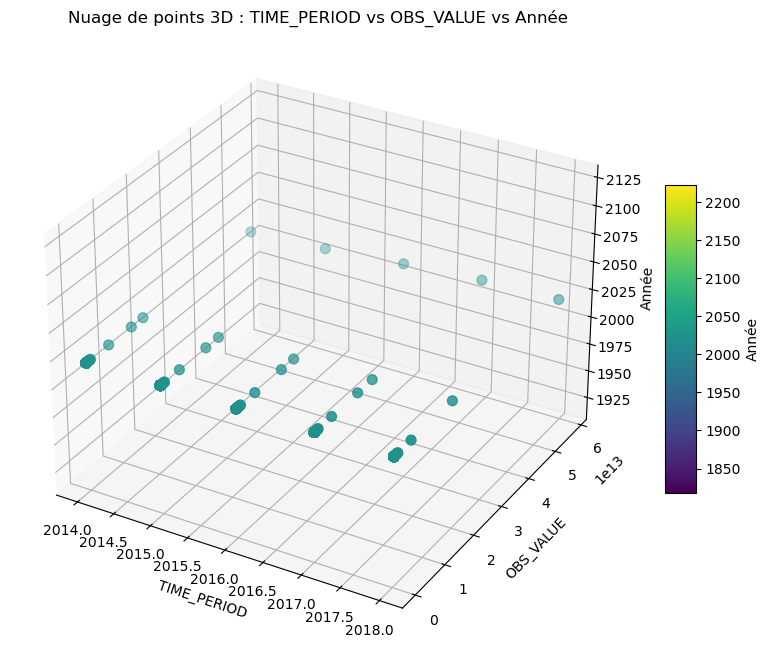

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Charger les données depuis un fichier CSV
file_path = "full_data(1).csv"  # Assurez-vous que le chemin du fichier est correct
data = pd.read_csv(file_path)

# Vérification des colonnes nécessaires
required_columns = ["TIME_PERIOD", "OBS_VALUE", "Année"]
if all(col in data.columns for col in required_columns):
    # Remplir les valeurs manquantes dans "Année" (si nécessaire)
    data["Année"].fillna(2020, inplace=True)

    # Convertir les colonnes en valeurs numériques
    for col in required_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Supprimer les lignes avec des valeurs manquantes
    data = data.dropna(subset=required_columns)

    # Vérifier les données restantes
    if data.empty:
        print("Les données sont vides après nettoyage. Vérifiez votre fichier CSV.")
    else:
        # Sélectionner les colonnes pour la visualisation 3D
        x = data["TIME_PERIOD"]
        y = data["OBS_VALUE"]
        z = data["Année"]

        # Création de la figure pour la 3D
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Tracer le nuage de points 3D
        scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

        # Ajouter une barre de couleur
        cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
        cbar.set_label('Année')

        # Titres et labels
        ax.set_xlabel('TIME_PERIOD')
        ax.set_ylabel('OBS_VALUE')
        ax.set_zlabel('Année')
        ax.set_title('Nuage de points 3D : TIME_PERIOD vs OBS_VALUE vs Année')

        # Afficher le graphique
        plt.show()
else:
    print("Les colonnes nécessaires ne sont pas présentes dans les données :", required_columns)